# ***Portfolio Management Optimization***

## ***Overview***

*This project provides a comprehensive solution for Time Series Forecasting for Portfolio Management Optimization. The goal of this project is to leverage time series forecasting models, including ARIMA, SARIMA, and LSTM, to predict market trends, optimize asset allocation, and enhance portfolio performance at Guide Me in Finance (GMF) Investments. This project uses real-time financial data sourced from YFinance to guide investment strategies and improve risk management.*

*This Notebook is concerned with Data Preprocessing & Exploration: Cleaning and preparing historical financial data from assets like Tesla (TSLA), Vanguard Total Bond Market ETF (BND), and S&P 500 ETF (SPY).*

### ***1.Data Collection***

In [1]:
#Import libraries
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np

import sys
sys.path.append('../scripts')

from data_analysis import DataAnalysis
import preprocessing as pp

In [2]:
#Download a dataset for Tesla, S&P, and Vanguard
df_tsla, df_sp, df_bnd = pp.data_loader()

2025-02-27 14:30:48,084 - INFO - Loading Datasets...
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
2025-02-27 14:30:49,636 - INFO - ✅ Dataset Successfully Loaded.


In [3]:
#View sample data
print(df_tsla.head())

            Adj Close      Close       High        Low       Open    Volume
Date                                                                       
2015-01-02  14.620667  14.620667  14.883333  14.217333  14.858000  71466000
2015-01-05  14.006000  14.006000  14.433333  13.810667  14.303333  80527500
2015-01-06  14.085333  14.085333  14.280000  13.614000  14.004000  93928500
2015-01-07  14.063333  14.063333  14.318667  13.985333  14.223333  44526000
2015-01-08  14.041333  14.041333  14.253333  14.000667  14.187333  51637500


In [4]:
#View sample data
print(df_sp.head())

             Adj Close       Close        High         Low        Open  \
Date                                                                     
2015-01-02  172.592834  205.429993  206.880005  204.179993  206.380005   
2015-01-05  169.475937  201.720001  204.369995  201.350006  204.169998   
2015-01-06  167.879654  199.820007  202.720001  198.860001  202.089996   
2015-01-07  169.971573  202.309998  202.720001  200.880005  201.419998   
2015-01-08  172.987717  205.899994  206.160004  203.990005  204.009995   

               Volume  
Date                   
2015-01-02  121465900  
2015-01-05  169632600  
2015-01-06  209151400  
2015-01-07  125346700  
2015-01-08  147217800  


In [5]:
#View sample data
print(df_bnd.head())

            Adj Close      Close       High        Low       Open   Volume
Date                                                                      
2015-01-02  62.573128  82.650002  82.690002  82.419998  82.430000  2218800
2015-01-05  62.754848  82.889999  82.919998  82.699997  82.739998  5820100
2015-01-06  62.936504  83.129997  83.379997  83.029999  83.029999  3887600
2015-01-07  62.974358  83.180000  83.279999  83.050003  83.139999  2433400
2015-01-08  62.875992  83.050003  83.110001  82.970001  83.110001  1873400


### ***2.Data Preprocessing***

#### ***2.1 Data Understanding***

In [6]:
#General information for TSLA
pp.general_info(df_tsla)

2025-02-27 14:30:49,738 - INFO - ✅ General Information


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2535 entries, 2015-01-02 to 2025-01-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  2535 non-null   float64
 1   Close      2535 non-null   float64
 2   High       2535 non-null   float64
 3   Low        2535 non-null   float64
 4   Open       2535 non-null   float64
 5   Volume     2535 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 138.6 KB
Missing Values for TSLA: None


In [7]:
#General information for S&P
pp.general_info(df_sp)

2025-02-27 14:30:49,753 - INFO - ✅ General Information


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2535 entries, 2015-01-02 to 2025-01-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  2535 non-null   float64
 1   Close      2535 non-null   float64
 2   High       2535 non-null   float64
 3   Low        2535 non-null   float64
 4   Open       2535 non-null   float64
 5   Volume     2535 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 138.6 KB
Missing Values for TSLA: None


In [8]:
#General information
pp.general_info(df_bnd)

2025-02-27 14:30:49,767 - INFO - ✅ General Information


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2535 entries, 2015-01-02 to 2025-01-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  2535 non-null   float64
 1   Close      2535 non-null   float64
 2   High       2535 non-null   float64
 3   Low        2535 non-null   float64
 4   Open       2535 non-null   float64
 5   Volume     2535 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 138.6 KB
Missing Values for TSLA: None


In [9]:
#General statistics for TSLA
pp.general_statistics(df_tsla)

2025-02-27 14:30:49,799 - INFO - ✅ General Statistics


Missing Values for TSLA:          Adj Close        Close         High          Low         Open  \
count  2535.000000  2535.000000  2535.000000  2535.000000  2535.000000   
mean    117.848209   117.848209   120.474827   115.097514   117.877662   
std     116.508288   116.508288   119.236025   113.698930   116.611575   
min       9.578000     9.578000    10.331333     9.403333     9.488000   
25%      17.228000    17.228000    17.527667    16.942000    17.259334   
50%      30.298000    30.298000    32.329334    29.760000    31.299999   
75%     221.525002   221.525002   226.696671   217.061661   222.653336   
max     479.859985   479.859985   488.540009   457.510010   475.899994   

             Volume  
count  2.535000e+03  
mean   1.120308e+08  
std    7.387509e+07  
min    1.062000e+07  
25%    6.680295e+07  
50%    9.264180e+07  
75%    1.294283e+08  
max    9.140820e+08  


In [10]:
#General statistics for S&P
pp.general_statistics(df_sp)

2025-02-27 14:30:49,817 - INFO - ✅ General Statistics


Missing Values for TSLA:          Adj Close        Close         High          Low         Open  \
count  2535.000000  2535.000000  2535.000000  2535.000000  2535.000000   
mean    316.067403   336.990939   338.754197   334.960020   336.942075   
std     117.926910   109.846069   110.361185   109.240592   109.844223   
min     156.800858   182.860001   184.100006   181.020004   182.339996   
25%     214.841949   243.324997   244.315002   242.294998   243.215004   
50%     277.117889   301.089996   302.230011   299.459991   301.250000   
75%     405.869171   422.039993   424.845001   419.305008   422.509995   
max     609.750000   609.750000   610.780029   607.020020   609.809998   

             Volume  
count  2.535000e+03  
mean   8.714655e+07  
std    4.487253e+07  
min    2.027000e+07  
25%    5.862005e+07  
50%    7.642870e+07  
75%    1.018866e+08  
max    5.072443e+08  


In [11]:
#General statistics for BND
pp.general_statistics(df_bnd)

2025-02-27 14:30:49,849 - INFO - ✅ General Statistics


Missing Values for TSLA:          Adj Close        Close         High          Low         Open  \
count  2535.000000  2535.000000  2535.000000  2535.000000  2535.000000   
mean     69.289451    80.127467    80.243424    80.009724    80.131882   
std       4.792146     5.178070     5.162081     5.193305     5.180034   
min      61.860897    68.040001    68.379997    67.989998    68.080002   
25%      65.565273    75.420002    75.620003    75.280003    75.449997   
50%      68.329147    81.320000    81.430000    81.220001    81.349998   
75%      72.879932    83.970001    84.089996    83.860001    83.940002   
max      78.823257    89.480003    89.589996    89.440002    89.550003   

             Volume  
count  2.535000e+03  
mean   4.233200e+06  
std    2.796083e+06  
min    0.000000e+00  
25%    2.057700e+06  
50%    3.805800e+06  
75%    5.626700e+06  
max    3.193720e+07  


#### ***2.2 Checking for Missing Values***

In [12]:
#Check for Missing values
pp.check_for_missing_values(df_tsla,df_sp,df_bnd)

2025-02-27 14:30:49,872 - INFO - Checking for missing Values...
2025-02-27 14:30:49,881 - INFO - ✅ Checking Successful.


Missing Values for TSLA: Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64
Missing Values for S&P: Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64
Missing Values for BND: Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64


***Key Inisghts***

- *There are no missing values in the data.*
- *The data types are correct for all the features.*
- *There are 2535 entries in the datasets.*


### ***3.Exploratory Data Analysis***

#### ***3.1. Closing Price Plot***

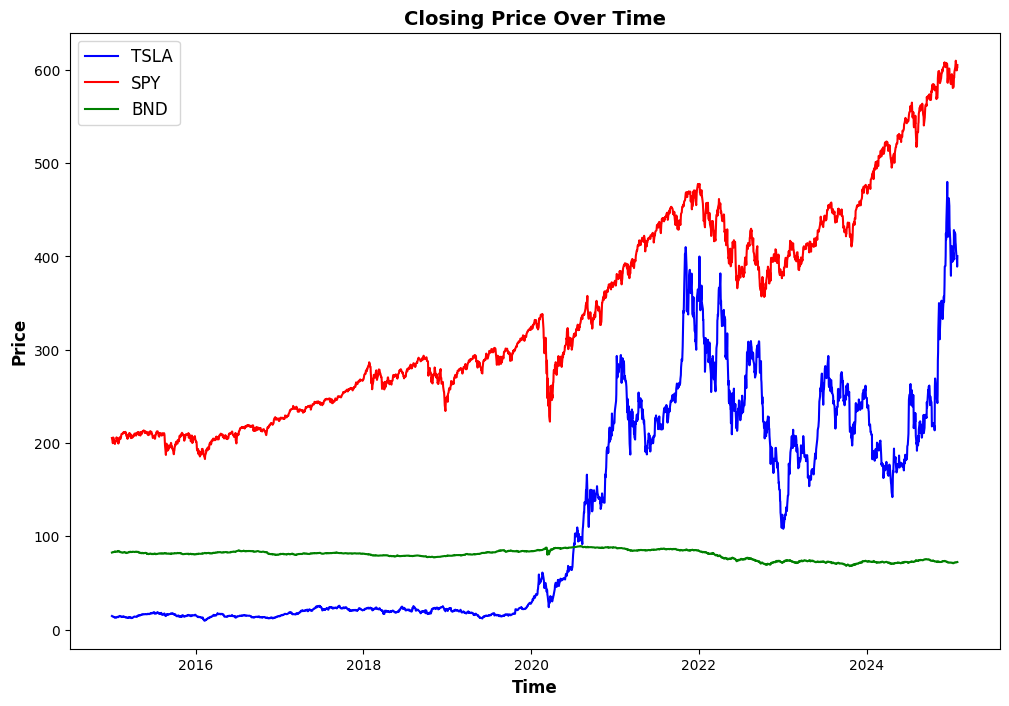

In [13]:
#Initialize the class
da = DataAnalysis(df_tsla,df_sp,df_bnd)

#Plot the closing price over time
da.plot_closing_price()

***Key Insights***

- *SPY is traded at a higher price point compared to BND and TSLA.*
- *SPY’s price variation is more moderate compared to TSLA’s, indicating less volatility.*
- *BND shows smooth price movements, reflecting a stable and consistent price variation.*
- *TSLA’s price exhibits high volatility with frequent fluctuations.*
- *The overall trend for TSLA and SPY is upward, while BND remains relatively constant.*

#### ***3.2. Daily Percentage Change***

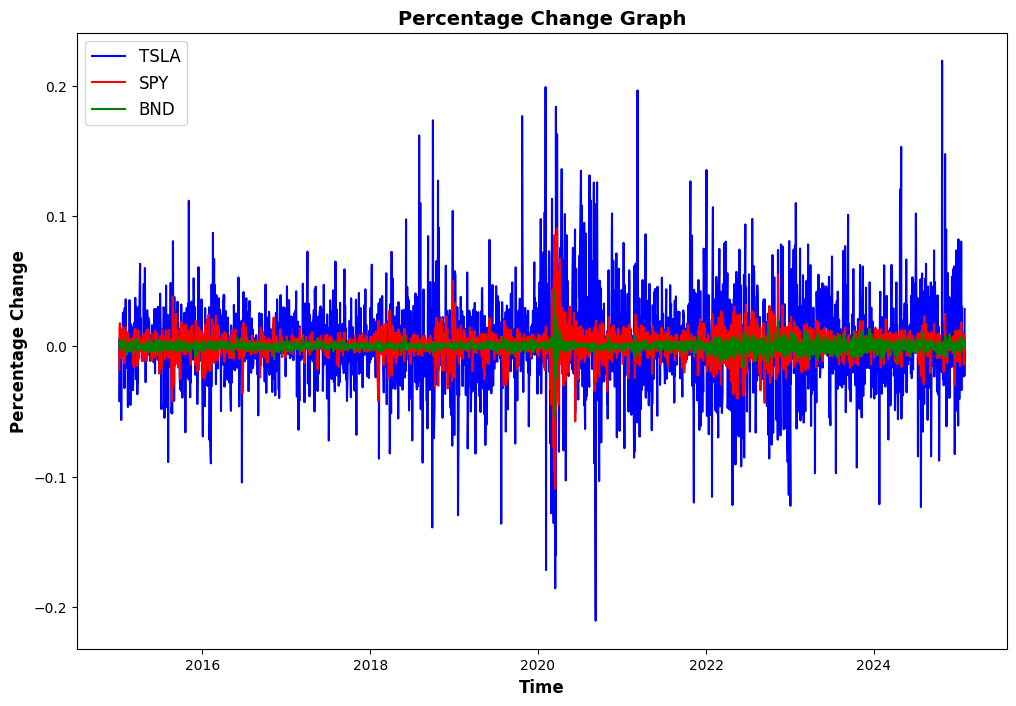

In [14]:
#plot pct change
da.pct_change_plot()

***Key Insights***

- *The daily percentage change graph indicates that TSLA is highly volatile, SPY exhibits moderate volatility, and BND is stable*

#### ***3.3. Rolling Mean and Std***

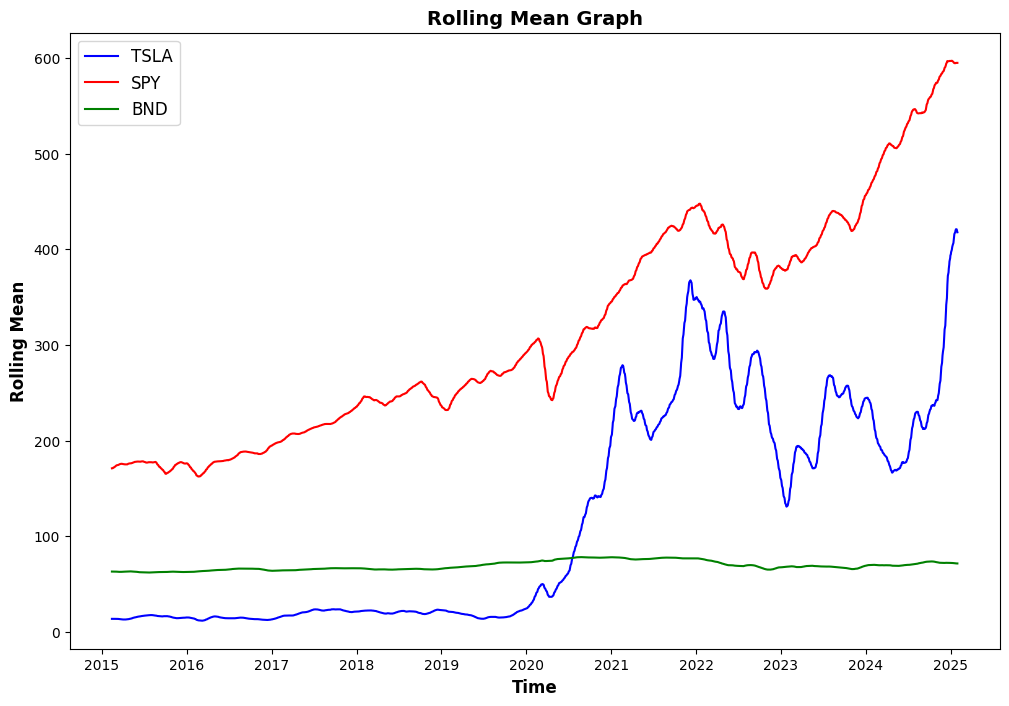

In [15]:
#Plot Rolling Mean
da.rolling_mean_plot()

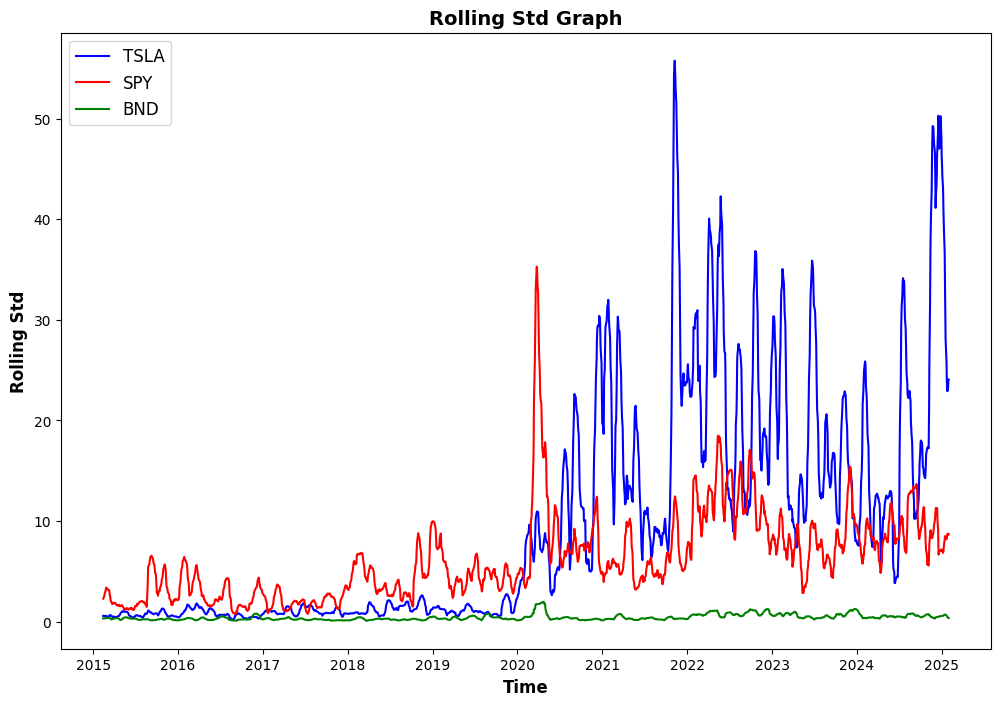

In [16]:
#Plot Rolling Std
da.rolling_std_plot()

#### ***3.4. Outlier Detection***

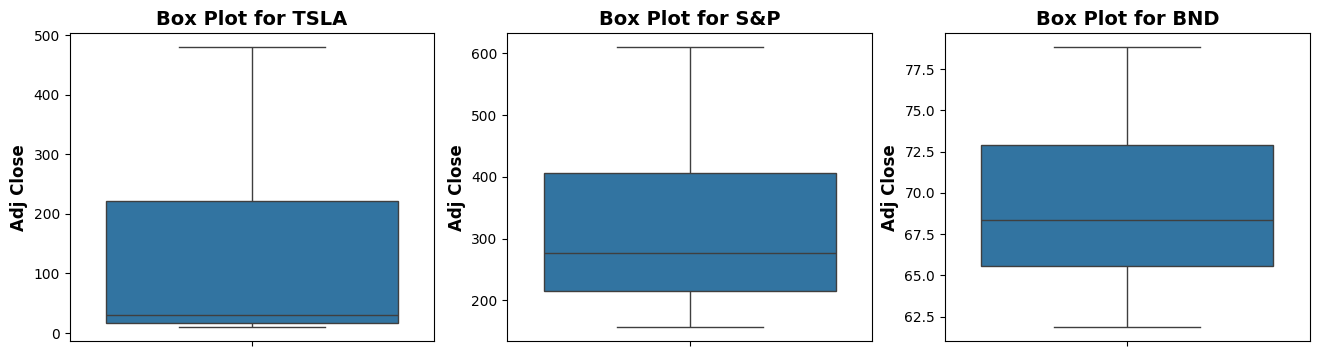

In [17]:
#Outlier Detection
da.outlier_detection()

#### ***3.5. Seasonal Decomposition***

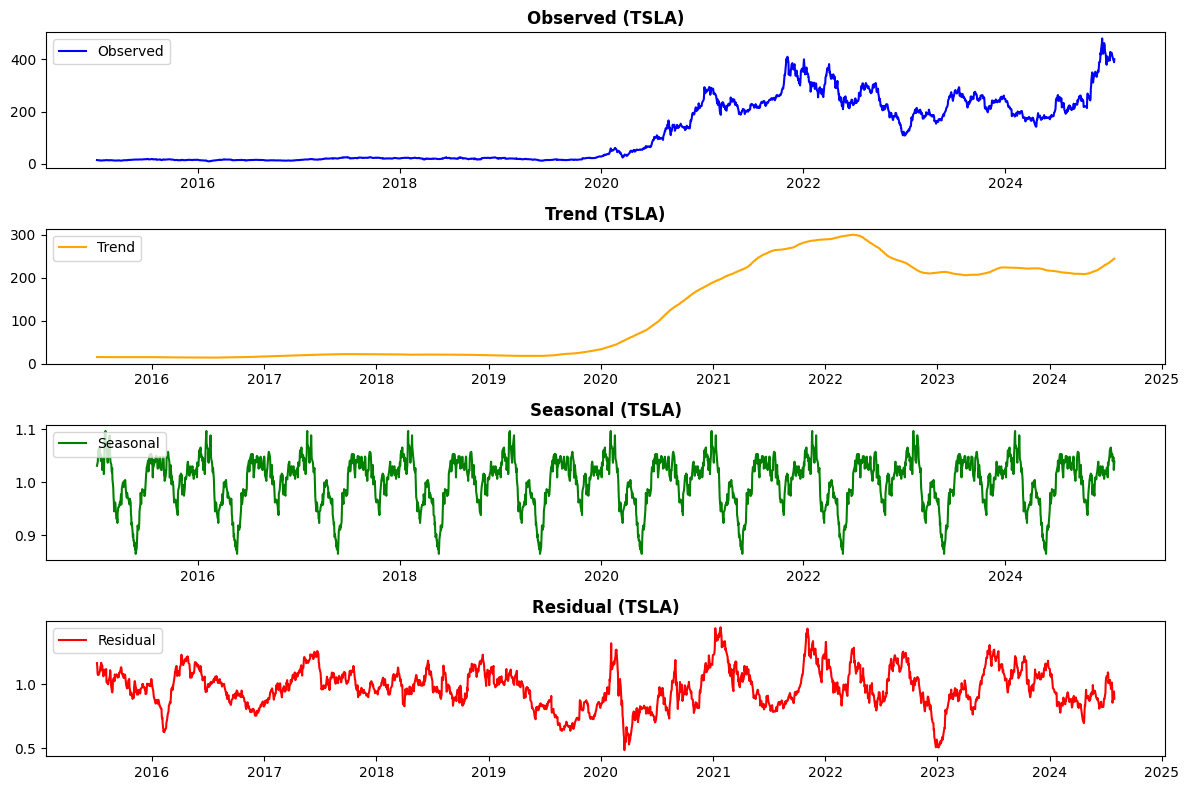

In [18]:
#Seasonal Decomposition for TSLA
da.seasonal_decomposition_tsla()

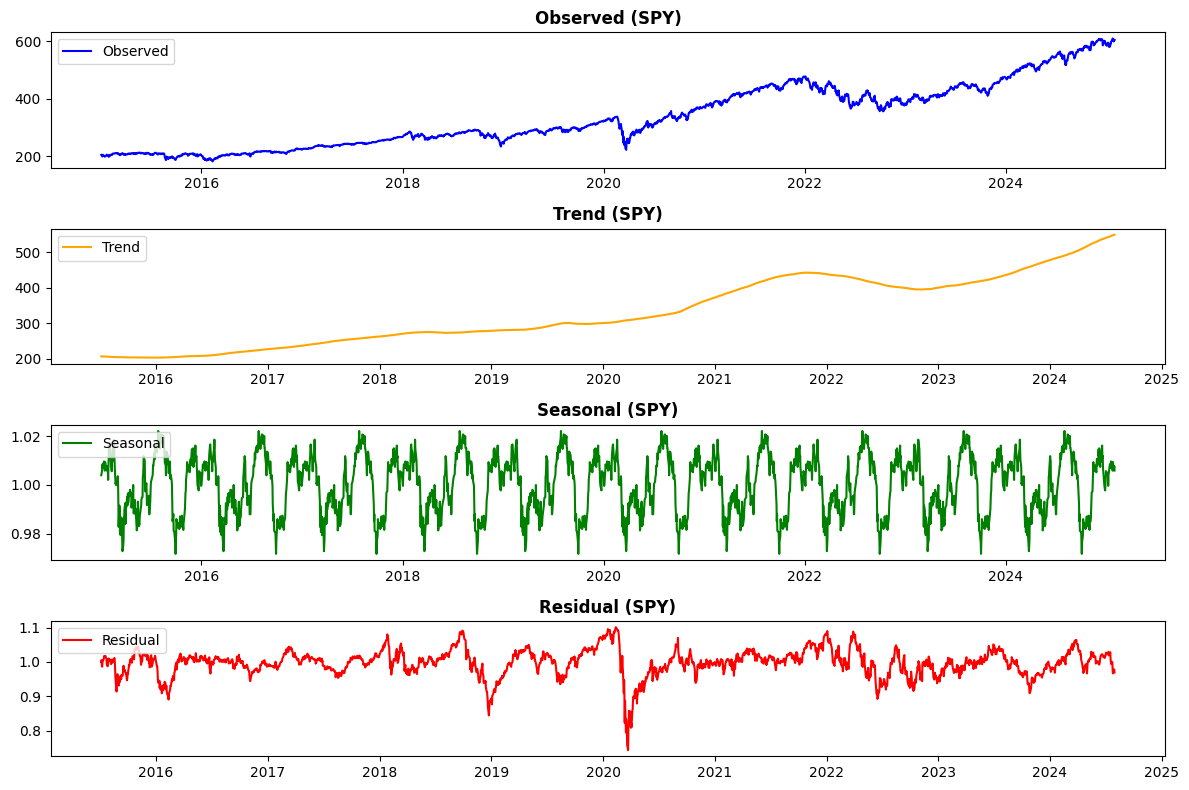

In [19]:
#Seasonal Decomposition for SPY
da.seasonal_decomposition_sp()

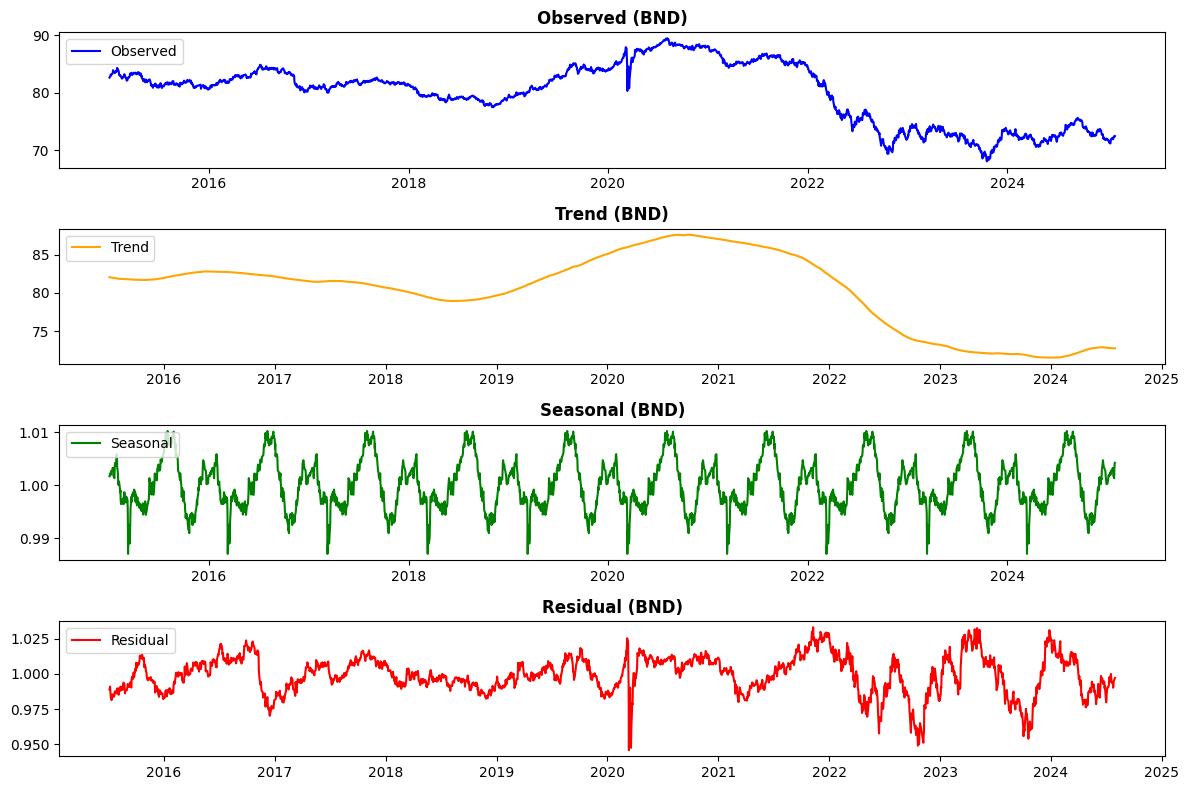

In [20]:
#Seasonal decomposition for BND
da.seasonal_decomposition_bnd()

***Key Insights***

- *The overall trend for TSLA and SPY is upward, while BND is decreasing.*
- *All three of the stock show seasonality*

#### ***3.6. Sharpe and VaR Ratio***

In [21]:
#SHARPE ratio Annual
#Define the risk free rate
risk_free_rate = 0.02/252 # 252 Number of trading days in a year
sharpe_ratio_tsla = np.sqrt(252)*(df_tsla['Adj Close'].pct_change().dropna().mean() - risk_free_rate)/df_tsla['Adj Close'].pct_change().dropna().std()
sharpe_ratio_sp = np.sqrt(252)*(df_sp['Adj Close'].pct_change().dropna().mean() - risk_free_rate)/df_sp['Adj Close'].pct_change().dropna().std()
sharpe_ratio_bnd = np.sqrt(252)*(df_bnd['Adj Close'].pct_change().dropna().mean() - risk_free_rate)/df_bnd['Adj Close'].pct_change().dropna().std()


print(f"SHARPE ratio for TSLA: {sharpe_ratio_tsla}")
print(f"SHARPE ratio for S&P: {sharpe_ratio_sp}")
print(f"SHARPE ratio for BND: {sharpe_ratio_bnd}")

SHARPE ratio for TSLA: 0.825698921799306
SHARPE ratio for S&P: 0.6838426161407427
SHARPE ratio for BND: -0.07866229330245171


In [22]:
#Value at Risk
confidence_level = 0.95
var_tsla = np.percentile(df_tsla['Adj Close'].pct_change().dropna(), (1 - confidence_level) * 100)
var_sp = np.percentile(df_sp['Adj Close'].pct_change().dropna(), (1 - confidence_level) * 100)
var_bnd = np.percentile(df_bnd['Adj Close'].pct_change().dropna(), (1 - confidence_level) * 100)

print(f"VaR ratio for TSLA: {var_tsla}")
print(f"VaR ratio for S&P: {var_sp}")
print(f"VaR ratio for BND: {var_bnd}")

VaR ratio for TSLA: -0.05138725064469326
VaR ratio for S&P: -0.016718866675937805
VaR ratio for BND: -0.0048010439816764325


***Key Insights***

- *Tesla has the highest Sharpe ratio among the three assets, suggesting that despite its high volatility, it provides a relatively good return for the risk taken.*
- *The S&P 500 shows a lower Sharpe ratio than TSLA, meaning its risk-adjusted returns are slightly worse.*
- *A negative Sharpe ratio suggests that BND’s risk-adjusted returns are poor, meaning the investment is underperforming relative to a risk-free asset (such as U.S. Treasury bonds).*

- *A 5.14% potential loss over the given period suggests that TSLA is the most volatile and risky among the three assets.*
- *The S&P 500 has moderate downside risk, with a potential loss of 1.67% over the same period.*
- *A 0.48% potential loss suggests that BND is the most stable asset in this set.*

#### ***Export the Datasets***

In [23]:
#Export the data
df_tsla.to_csv('../data/TESLA.csv')
df_sp.to_csv('../data/SP.csv')
df_bnd.to_csv('../data/BND.csv')